Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [59]:
using SparseArrays, LinearAlgebra
using Causality
T, N = 20.0, 30
ρ = 3/N
G = Causality.makeGNP(N,ρ)

30×30 SparseMatrixCSC{Bool, Int64} with 84 stored entries:
⠀⠀⠂⠅⠀⠀⠀⢀⠀⠀⢀⠀⠀⠂⠀
⠌⠄⢠⠒⠠⠀⠂⠀⡀⠈⠃⠆⠐⠐⠀
⠀⠀⠀⠂⠄⠁⢀⠀⣐⠀⠀⠀⠐⢐⠀
⠀⢀⠈⠀⠀⠐⠀⠀⠄⠀⠈⠀⠐⠄⡄
⠀⠀⡀⠈⠐⠘⠀⠁⢀⠐⠠⠈⡀⠒⠀
⠀⠐⠩⠄⠀⠀⠂⠀⡀⠂⠀⠀⣀⠀⢀
⠠⠀⢐⠀⢐⢀⠐⠄⢠⠈⠀⠘⠠⠂⠀
⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠐⠀⠀⠀

In [60]:
getpar(p,a1,b1,c1,a2,b2,c2) = [fill(p, 1, N);
     fill(a1, 1, N); fill(b1, 1, N); fill(c1, 1, N);
     fill(a2,   1, N); fill(b2, 1, N); fill(c2, 1, N)]

getpar (generic function with 1 method)

In [61]:
ε = 1e-10
λ = 0.1
θp = getpar(1/N, ε, T/2, 1/ε,   1.0, T/2, 1/ε)
θmin = getpar(ε  , ε  ,  -T,   ε,   ε,  -T, ε  )
θmax = getpar(1-ε, 1/ε,  2T, 1/ε, 1/ε,  2T, 1/ε)
const I = IndividualSI{GaussianRate,GaussianRate}

IndividualSI{GaussianRate, GaussianRate}

In [62]:
Mp = StochasticModel{I}(T, θp, G, ConstantRate(λ));
sample! = Sampler(Mp);

In [9]:
ε = 2e-3
θp2 = getpar(1/N, ε, T/2, 1/ε,   1.0, T/2, 1/ε)
Mp2 = StochasticModel{I}(T, θp2, G, ConstantRate(λ));

In [10]:
θ = getpar(2/N  , 2/N  ,  T/2,   2*T,   1,  T/2, 3*T  )
M = StochasticModel{I}(T, θ, G, ConstantRate(λ));

In [11]:
xtrue = zeros(N)
sample!(xtrue)
nobs, p = 5, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 15.375076853403053, 1.0e-6)
 (2, 0, 19.230433759728825, 1.0e-6)
 (3, 1, 18.210220784265086, 1.0e-6)
 (4, 1, 10.672067858636893, 1.0e-6)
 (5, 1, 17.017419844774793, 1.0e-6)

In [19]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=500, numiters=100, 
         θmin=θmin, θmax=θmax, descender=SignDescender(0.03));

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
  F:  3.8622962249657076


In [13]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [39]:
stats = post(Mp, O, numsamples=1000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


In [30]:
sample! = Sampler(M)
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


30×1×100000 Array{Float64, 3}:
[:, :, 1] =
  2.7770793461578673
 20.0
  7.902549548043149
  2.478292544839926
  7.568264691833461
  8.310355840676658
 11.213658701758764
 20.0
 10.12855672800318
 14.058684145037287
  9.544876324266022
  9.16712651103196
  6.11535204364588
  ⋮
  9.491608938522745
  0.12879784074506873
 20.0
  9.91753706138922
  4.125373277076267
  2.6779145249777407
  6.700938850832269
 14.432357902621934
  4.103204117431384
 16.603897319518893
  3.111020460500859
  5.073504214153519

[:, :, 2] =
 12.471018782487466
 20.0
 16.717879849573585
  3.305270311921639
  0.0
  5.396028432890934
  9.231986767313241
 12.339229967520058
 18.4703359709131
 20.0
 20.0
  0.0
 14.570662106659366
  ⋮
 13.223207822834546
  0.9160239673397408
 20.0
  1.982885696130646
 10.669981656101543
 12.470759951188125
  9.191914505022622
 13.849547350624771
 18.937292006355364
 20.0
 13.959263215927955
 18.155971801708795

[:, :, 3] =
  4.929019133060356
 20.0
 10.028634220691089
  6.90949450267287

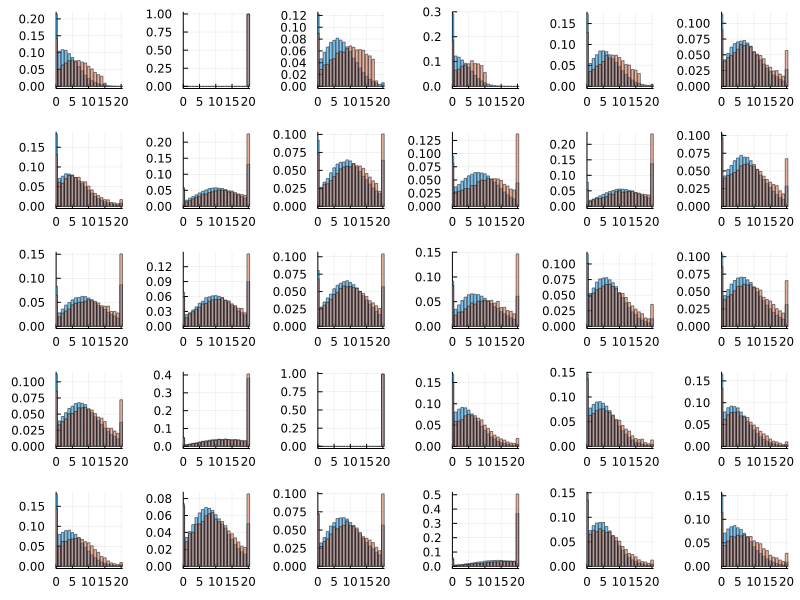

In [40]:
using Plots
pl = map(1:N) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[k, 1, :]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[k, 1, :]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
plot(pl..., size=(800,600))

In [49]:
statsw, w = reweighted_post(Mp2, M, O; numsamples=10^4);


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [50]:
function histow(v, weights; bins=20, up=1.0)
    h = zeros(bins+1)
    for (x,w) in zip(v,weights)
        h[floor(Int, x*bins/up)+1]+=w
    end
    h
end

histow (generic function with 1 method)

In [51]:
sum(w)

1.0

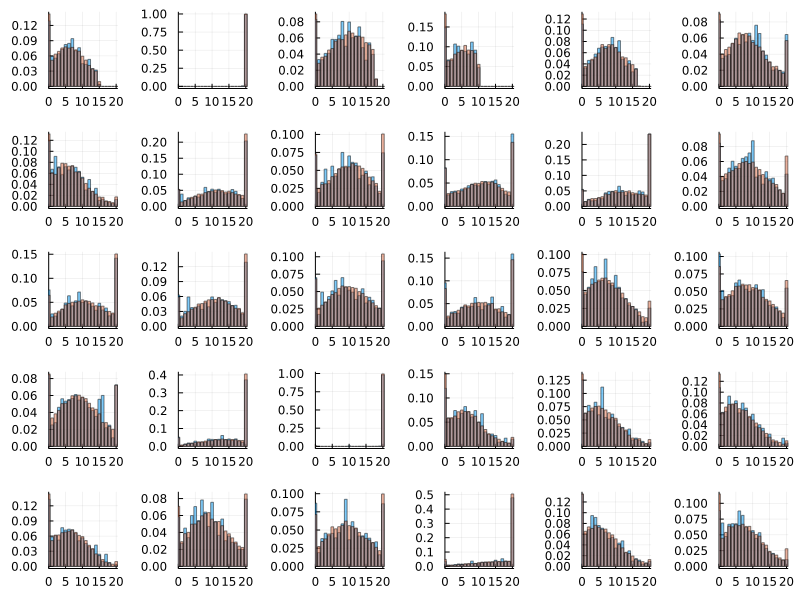

In [52]:
using Plots
pl = map(1:N) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histow((@view statsw[k, 1, :]),w, up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[k, 1, :]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [53]:
function marginal(i, t, stats)
    numsamp = size(stats,2)
    sum(stats[i,:] .< t)/numsamp
end

function marginalweight(i, t, stats, weight)
    sum((stats[i,:] .< t) .* weight)
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

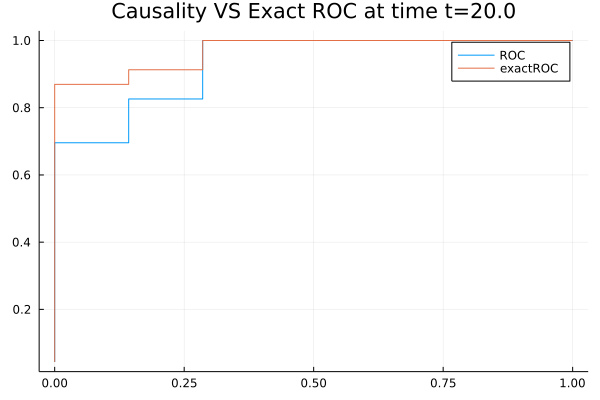

In [55]:
#Let us find the ROC of the infected individuals at time t

t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau[:,1,:])
   true_risk[i] = marginal(i,t,stats[:,1,:])
end
xt = xtrue .< t
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

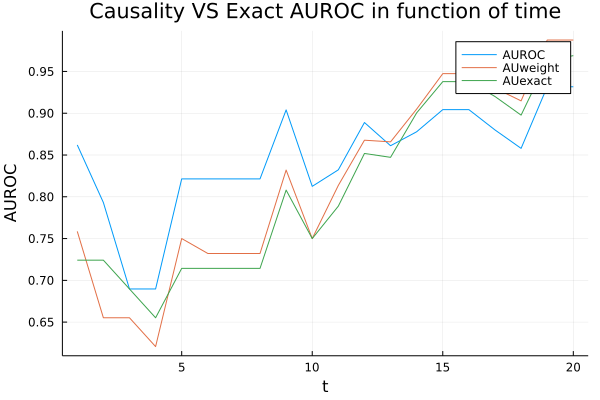

In [58]:
T = Int(T)
AU_curve=zeros(T)
AU_weight=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    weight_risk = zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau[:,1,:])
       true_risk[i] = marginal(i,t,stats[:,1,:])
       weight_risk[i] = marginalweight(i,t,statsw[:,1,:], w)
    end
    xt = xtrue .< t
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_weight[t] = AUROC(ROC(xt, weight_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_weight, label="AUweight")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
xlabel!("t")
ylabel!("AUROC")